<a href="https://colab.research.google.com/github/Nikhil5566/Machine-Learning/blob/main/ML_Project_4_Heart_Disease_UCI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# Installing Kaggle API
!pip install -q kaggle

# Uploading kaggle.json
from google.colab import files
files.upload()

# Moving kaggle.json to ~/.kaggle/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Downloading the dataset using Kaggle API
!kaggle datasets download -d redwankarimsony/heart-disease-data

# Unziping the downloaded file
!unzip heart-disease-data.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 52.2MB/s]
Archive:  heart-disease-data.zip
  inflating: heart_disease_uci.csv   


In [3]:
data = pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Select relevant columns and rename target
data = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'thalch', 'num']].copy()
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

In [5]:
# Handle missing values
data['trestbps'].fillna(data['trestbps'].mean(), inplace=True)
data['chol'].fillna(data['chol'].mean(), inplace=True)
data['thalch'].fillna(data['thalch'].mean(), inplace=True)
data.dropna(subset=['cp'], inplace=True)

In [6]:
# Encode categorical variables
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})
data = pd.get_dummies(data, columns=['cp'], drop_first=True)

In [7]:
# Show first 5 rows
print("First 5 rows of the data:")
print(data.head())

First 5 rows of the data:
   age  sex  trestbps   chol  thalch  num  cp_atypical angina  cp_non-anginal  \
0   63    0     145.0  233.0   150.0    0               False           False   
1   67    0     160.0  286.0   108.0    1               False           False   
2   67    0     120.0  229.0   129.0    1               False           False   
3   37    0     130.0  250.0   187.0    0               False            True   
4   41    1     130.0  204.0   172.0    0                True           False   

   cp_typical angina  
0               True  
1              False  
2              False  
3              False  
4              False  


In [8]:
# Show missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
age                   0
sex                   0
trestbps              0
chol                  0
thalch                0
num                   0
cp_atypical angina    0
cp_non-anginal        0
cp_typical angina     0
dtype: int64


In [9]:
# Define features and target
features = [col for col in data.columns if col != 'num']
target = 'num'

In [10]:
# Split data into features (X) and target (y)
X = data[features]
y = data[target]

In [11]:
# Scale numerical features
scaler = StandardScaler()
X[['age', 'trestbps', 'chol', 'thalch']] = scaler.fit_transform(X[['age', 'trestbps', 'chol', 'thalch']])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"\nLogistic Regression Accuracy: {lr_accuracy:.2f}")


Logistic Regression Accuracy: 0.79


In [13]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Random Forest Accuracy: 0.80


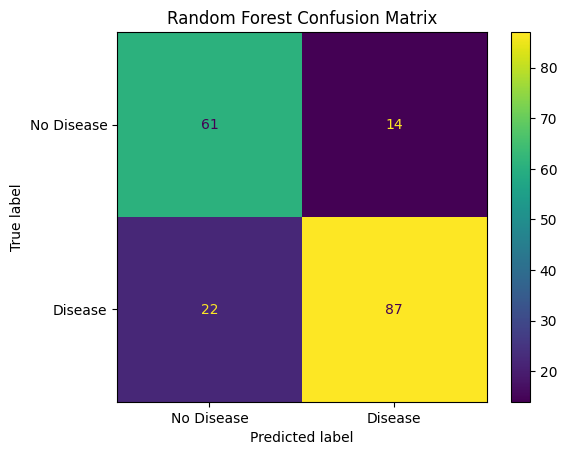

---------cholesterol vs. heart disease---------


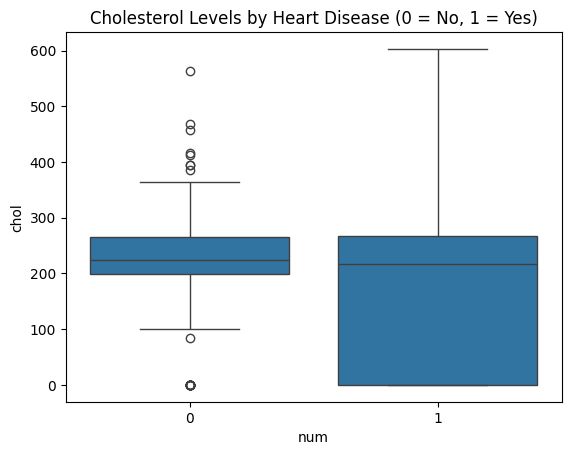

In [14]:
# Plot confusion matrix for Random Forest
cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm, display_labels=['No Disease', 'Disease']).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# Visualize cholesterol vs. heart disease
print('---------cholesterol vs. heart disease---------')
sns.boxplot(x='num', y='chol', data=data)
plt.title('Cholesterol Levels by Heart Disease (0 = No, 1 = Yes)')
plt.show()


-----------Classification Report:-----------
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        75
           1       0.86      0.80      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



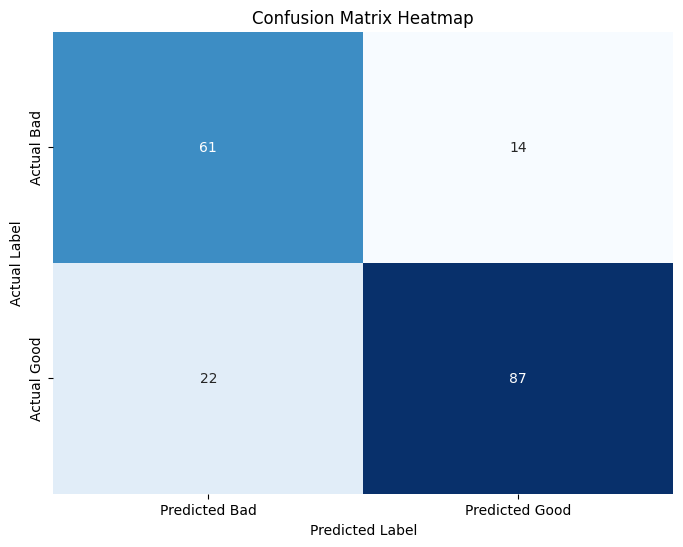

In [15]:
print("\n-----------Classification Report:-----------")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Bad', 'Predicted Good'],
            yticklabels=['Actual Bad', 'Actual Good'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Classification Report for Logistic Regression
print("\n-----------Classification Report (Logistic Regression):-----------")
print(classification_report(y_test, lr_pred))


-----------Classification Report (Logistic Regression):-----------
              precision    recall  f1-score   support

           0       0.71      0.81      0.76        75
           1       0.86      0.77      0.81       109

    accuracy                           0.79       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.80      0.79      0.79       184



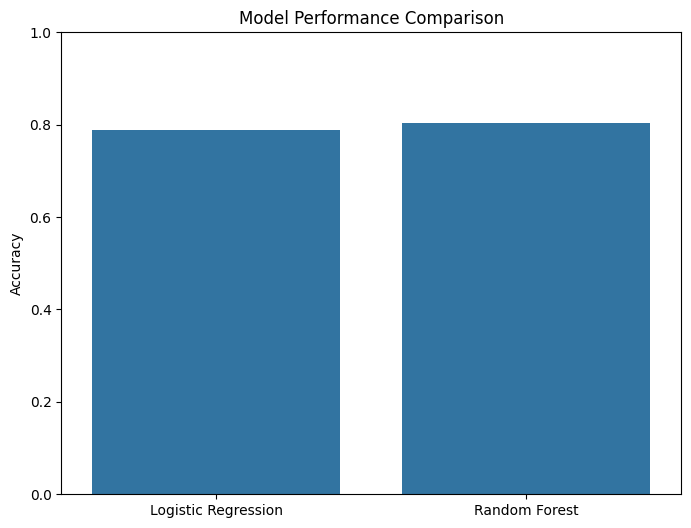

In [ ]:
# Performance Comparison Visualization
models = ['Logistic Regression', 'Random Forest']
accuracy_scores = [lr_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.show()

# Thank you